To use CatBoost we should install the following package

In [66]:
# !pip3 install catboost

***Import of the libraries***

In [67]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression, f_classif, mutual_info_classif
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

***Data reading***

We should upload the files that were gotten with the script of the regression problem. So, we could avoid doing the same data preprocessing.

In [68]:
OSA_df_cleaned = pd.read_excel("Data_processed.xlsx")
OSA_df_cleaned.head(5)

,Gender,IAH,Weight,Height,Age,Cervical,Smoker,BMI,Weight status,Age group
0,0,29.6,119,174,56,48.0,2,39.305060,3,0
1,0,19.7,78,168,39,42.0,1,27.636054,1,1
2,0,9.0,80,173,32,40.0,1,26.729927,1,1
3,0,2.0,109,190,32,42.0,1,30.193906,3,1
4,0,34.0,86,169,39,42.0,1,30.110991,3,1


In [69]:
OSA_before_encoding = pd.read_excel("Data_processed_bef_enc.xlsx")

***Data preprocessing for classification problem***



In [70]:
OSA_clmodel = OSA_df_cleaned.copy()
OSA_clmodel_be = OSA_before_encoding.copy()

In [71]:
OSA_clmodel['OSA_Class'] = pd.cut(OSA_clmodel['IAH'], 
                                  bins=[-float('Inf'),  10, 30, float('Inf')], 
                                  labels=['Healthy', 'Mild', 'Severe'])
OSA_clmodel_be['OSA_Class'] = pd.cut(OSA_clmodel_be['IAH'], 
                                     bins=[-float('Inf'),  10, 30, float('Inf')], 
                                     labels=['Healthy', 'Mild', 'Severe'])

In [73]:
OSA_clmodel.OSA_Class.value_counts()

Mild       237
Healthy    237
Severe     151
Name: OSA_Class, dtype: int64

In [ ]:
labelencoder = LabelEncoder()
OSA_clmodel['OSA_Class'] = labelencoder.fit_transform(OSA_clmodel['OSA_Class'])

In [75]:
OSA_clmodel.groupby('OSA_Class').describe()

Gender                                ... Age group                    
           count      mean       std  min  25%  ...       min  25%  50%  75%  max
OSA_Class                                       ...                              
0          237.0  0.409283  0.492742  0.0  0.0  ...       0.0  0.0  0.0  1.0  1.0
1          237.0  0.215190  0.411824  0.0  0.0  ...       0.0  0.0  0.0  0.0  1.0
2          151.0  0.178808  0.384467  0.0  0.0  ...       0.0  0.0  0.0  0.0  1.0

[3 rows x 80 columns]

***EDA for the classification problem***

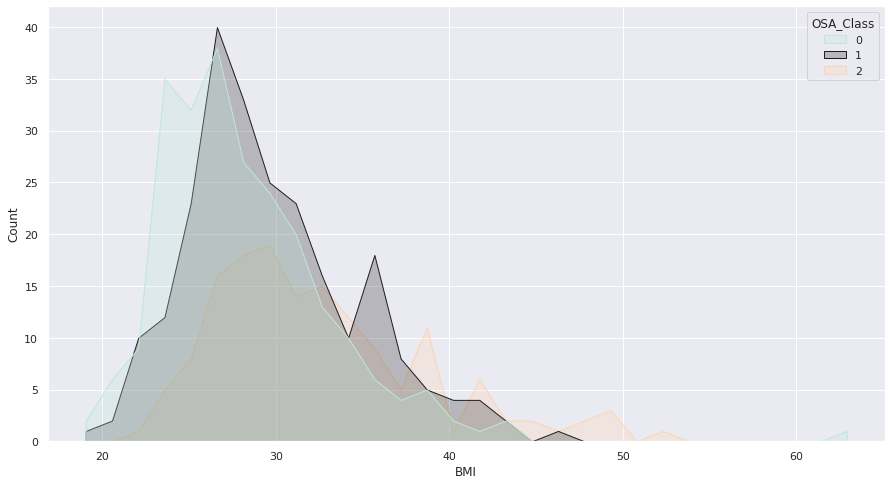

In [76]:
sns.histplot(data=OSA_clmodel, x="BMI", hue="OSA_Class", element="poly", palette='icefire')
sns.set(rc={'figure.figsize':(15,8)})

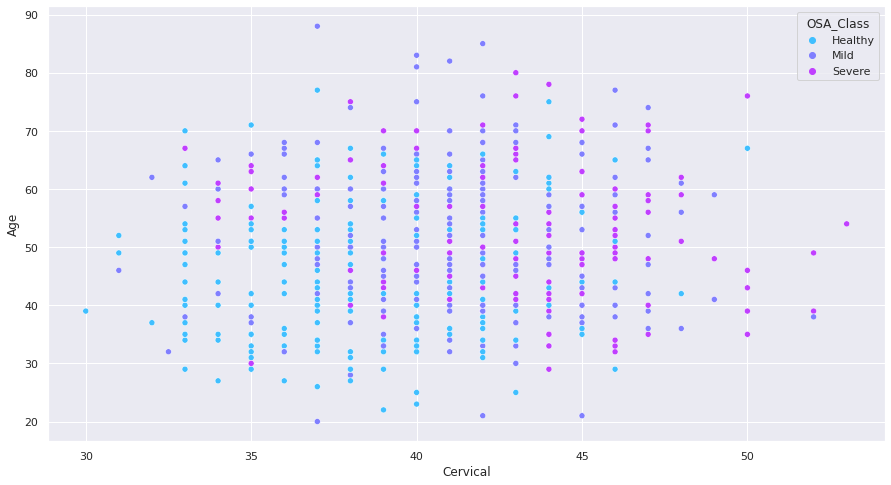

In [77]:
sns.scatterplot(data=OSA_clmodel_be, x="Cervical", y="Age", hue="OSA_Class", palette='cool')
sns.set(rc={'figure.figsize':(15,8)})

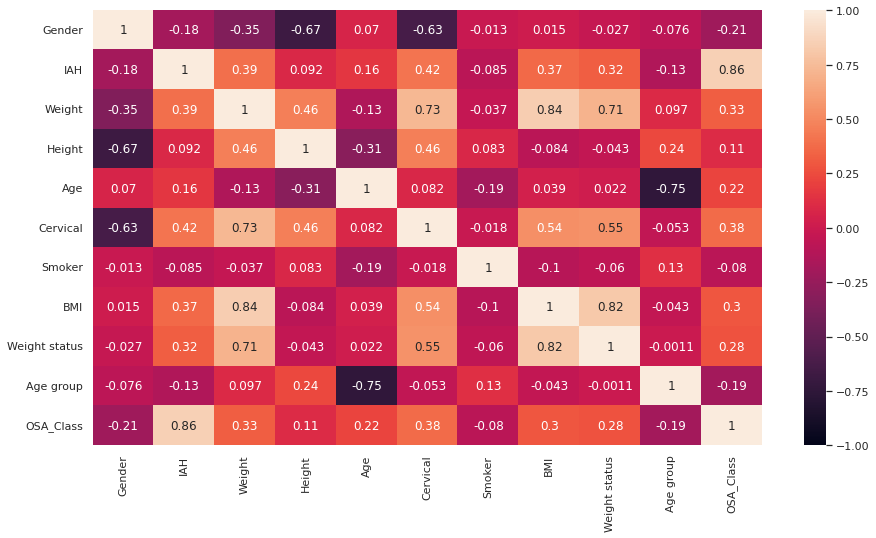

In [78]:
heatmap = sns.heatmap(OSA_clmodel.corr(), 
     		                 vmin=-1, vmax=1, annot=True)

***Feature selection***

In [79]:
X = OSA_clmodel.drop(['IAH', 'OSA_Class'], axis=1)
y = OSA_clmodel.OSA_Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

*F-statistic*

In [80]:
fs_cls = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs_cls.fit(X_train, y_train)
# transform train input data
X_train_fs_cls = fs_cls.transform(X_train)
# transform test input data
X_test_fs_cls = fs_cls.transform(X_test)
# return X_train_fs, X_test_fs, fs
for i in range(len(fs_cls.scores_)):
	print('Feature %s: %f' % (X.columns[i], fs_cls.scores_[i]))

Feature Gender: 12.760715
Feature Weight: 35.406656
Feature Height: 2.490216
Feature Age: 23.630409
Feature Cervical: 45.103604
Feature Smoker: 4.483589
Feature BMI: 31.255416
Feature Weight status: 21.952151
Feature Age group: 12.628863


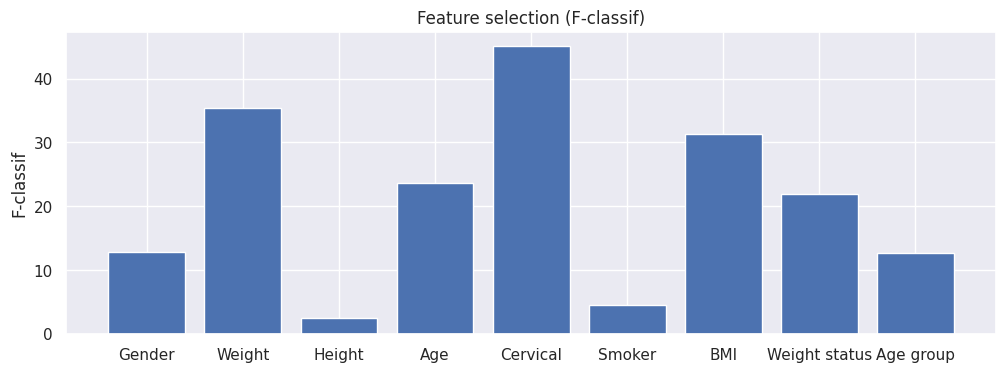

In [81]:
# plot the scores
labels = ['Gender', 'Weight', 'Height', 'Age',
          'Cervical', 'Smoker', 'BMI', 'Weight status', 'Age group']
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,4), dpi= 100)
ax.set_xticks(x) 
ax.set_xticklabels(labels)
ax.set_ylabel('F-classif')
ax.set_title('Feature selection (F-classif)')
plt.bar([i for i in range(len(fs_cls.scores_))], fs_cls.scores_)
plt.show()

*Mutual information*

In [82]:
fs_cls_mi = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs_cls_mi.fit(X_train, y_train)
# transform train input data
X_train_fs_cls = fs_cls.transform(X_train)
# transform test input data
X_test_fs_cls = fs_cls.transform(X_test)
# return X_train_fs, X_test_fs, fs
for i in range(len(fs_cls.scores_)):
	print('Feature %s: %f' % (X.columns[i], fs_cls.scores_[i]))

Feature Gender: 12.760715
Feature Weight: 35.406656
Feature Height: 2.490216
Feature Age: 23.630409
Feature Cervical: 45.103604
Feature Smoker: 4.483589
Feature BMI: 31.255416
Feature Weight status: 21.952151
Feature Age group: 12.628863


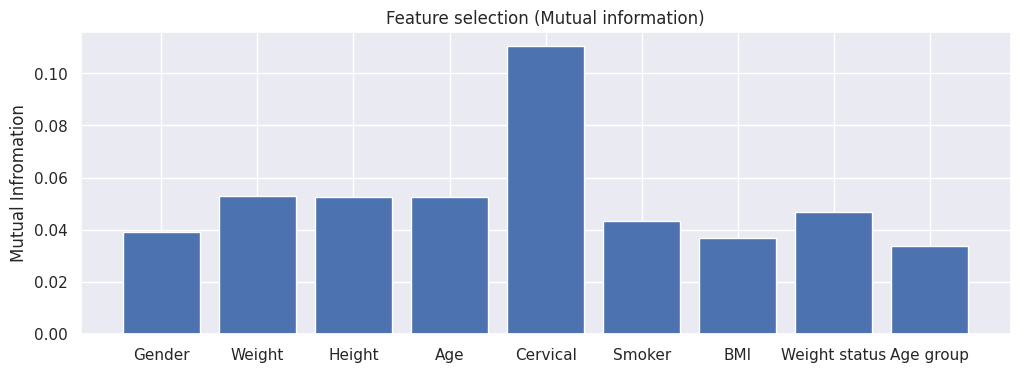

In [83]:
# plot the scores
labels = ['Gender', 'Weight', 'Height', 'Age',
          'Cervical', 'Smoker', 'BMI', 'Weight status', 'Age group']
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,4), dpi= 100)
ax.set_xticks(x) 
ax.set_xticklabels(labels)
ax.set_ylabel('Mutual Infromation')
ax.set_title('Feature selection (Mutual information)')
plt.bar([i for i in range(len(fs_cls_mi.scores_))], fs_cls_mi.scores_)
plt.show()

*Choosing the set of features*

In [84]:
features = ["Gender", 'Weight', 'Age', 'Cervical'];
# features = ["Gender", 'Age', 'Cervical', 'BMI', 'Smoker'];
X_train = X_train[features]
X_test = X_test[features]

***Scaling of the features***

In [ ]:
scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.fit_transform(X_test[features])

***Preparing the list of models for prediction***

In [86]:
list_of_models = ['Logistic Regression', 'Decision Tree',
                  'Support Vector Machines', 'Ridge',
                  'Random Forest', 'XGBoost', 'LightGBM',
                  'CatBoost']

***Useful functions to make the code shorter***

In [87]:
def grid_search_func(clas_model, hyper_params, folds):
  model_cv = GridSearchCV(estimator = clas_model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc_ovr', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
  model_cv.fit(X_train, y_train)
  print(model_cv.best_params_)
  best_params = model_cv.best_params_
  return best_params

def get_metrics(model, X_train, y_train, X_test, y_test):
  Trained_model = model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  f1_macro = f1_score(y_test, predictions, average='macro')
  f1_micro = f1_score(y_test, predictions, average='micro')
  return [f1_macro, f1_micro]

***ML models and their evaluation***

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
array_metrics = []
for Classification_model_name in list_of_models:

  if Classification_model_name == 'Logistic Regression':
    class_model = linear_model.LogisticRegression()
    [f1_macro, f1_micro] = get_metrics(class_model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

  elif Classification_model_name == 'Decision Tree':
    hyper_params = {'max_depth': range(1, 5, 1),
                    'max_features': [1, 2, 3, 4, 5]}
    class_model = DecisionTreeClassifier
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

  elif Classification_model_name == 'Support Vector Machines':
    hyper_params = {'kernel': ['linear', 'poly', 'rbf'],
                    'C' : range(1, 5, 1),
                    'degree': [2, 3, 4]}
    class_model = SVC
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])
    
  elif Classification_model_name == 'Ridge':
    hyper_params = {'alpha': np.arange(0.5, 5, 0.5)}
    class_model = linear_model.RidgeClassifier
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

  elif Classification_model_name == 'Random Forest':
    hyper_params = {'n_estimators': range(10, 200, 20),
                    'max_depth': range(1, 9, 2),
                    'min_samples_leaf': range(1, 4, 1)}
    class_model = RandomForestClassifier
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

  elif Classification_model_name == 'XGBoost':
    hyper_params = {'n_estimators': range(10, 200, 20),
                    'max_depth': range(1, 7, 1)}
    class_model = XGBClassifier
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

  elif Classification_model_name == 'LightGBM':
    hyper_params = {'n_estimators': range(10, 300, 30),
                    'max_depth': range(1, 7, 1),
                    'num_leaves': [10, 30, 50, 70, 100, 150]}
    class_model = lgb.LGBMClassifier
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

  elif Classification_model_name == 'CatBoost':
    hyper_params = {'iterations': range(10, 200, 10),
                    'depth': range(1, 5, 1)}
    class_model = CatBoostClassifier
    best_params = grid_search_func(class_model(), hyper_params, folds)
    model = class_model(**best_params)
    [f1_macro, f1_micro] = get_metrics(model, X_train, y_train, X_test, y_test)
    array_metrics.append([f1_macro, f1_micro])
    print(Classification_model_name, ':', [f1_macro, f1_micro])

***Dispalying the results (metrics)***

In [92]:
table_metrics_class = pd.DataFrame(array_metrics, columns=['F1_macro', 'F1_micro'], index = list_of_models)
table_metrics_class.sort_values(by='F1_macro', ascending=False)

,F1_macro,F1_micro
XGBoost,0.489948,0.512
Ridge,0.476006,0.512
CatBoost,0.467515,0.488
Support Vector Machines,0.465304,0.520
Logistic Regression,0.462950,0.496
Random Forest,0.456799,0.496
Decision Tree,0.434467,0.464
LightGBM,0.422447,0.464


***Plot results***

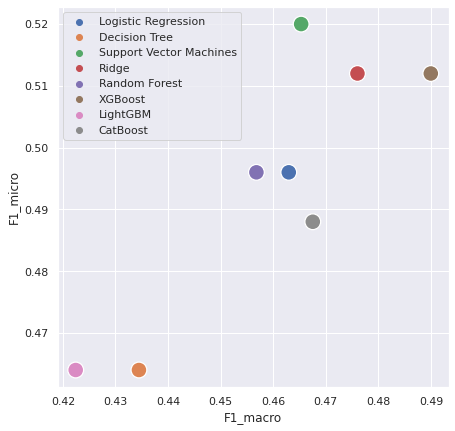

In [94]:
plt.figure(figsize = (7,7))
fig_sns = sns.scatterplot(data=table_metrics_class, x='F1_macro', 
                          y='F1_micro', hue=list_of_models, 
                          palette="deep", s=250, sizes=(40, 400))
fig = fig_sns.get_figure()
fig.savefig('Metrics_class.png', dpi = 800) 